In [1]:
import os

In [2]:
from torch.utils.data import Dataset
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from PIL import Image

from scraping.data import connection_url, download_file_from_s3
from scraping.tables import Text
from scraping.settings import SETTINGS


class CustomTextDataset(Dataset):
    def __init__(self):
        self.engine = create_engine(connection_url(asyncronous=False))
        Session = sessionmaker(bind=self.engine)
        self.session = Session()

        self.length: int = self.session.query(Text).order_by(Text.id.desc()).first().id

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        ma = self.session.query(Text).where(Text.id == (idx + 1))
        text = ma.first()
        image_path = text.image_path
        text = text.text

        download_file_from_s3(
            bucket_name=SETTINGS.S3_BUCKET, object_key=image_path, file=image_path
        )
        image = Image.open(image_path)
        os.remove(image_path)
        return text, image

ModuleNotFoundError: No module named 'torch'

In [14]:
dataset = CustomTextDataset()

In [15]:
text, image = dataset[0]

In [16]:
print(text)

 "So this is where the
jolly bears live!" said
Golden Hair, as she knocked
upon the door. "I want
to meet them." No answer came to her knocking, so
she pushed the door wide open and
walked in. It was a most disorderly house,
but a bright fire burned on the hearth,
over which hung a big, black kettle of
bubbling soup, while on the table, near
by, were three yellow bowls of different
sizes. "A big bowl for Papa Bear, a medium
sized bowl for Mamma Bear, and a little
bowl for the Tiny Bear," said Golden Hair.


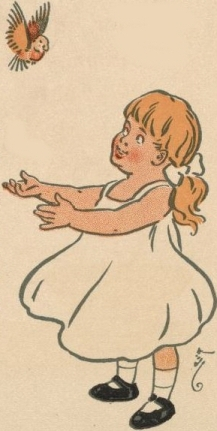

In [12]:
image